In [1]:
!nvidia-smi

Wed Mar 12 11:24:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

In [6]:


from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Emotion-Dataset--3 in yolov11:: 100%|██████████| 2466/2466 [00:00<00:00, 8498.20it/s]


In [7]:
dataset.location

'/content/Facial-Emotion-Dataset--3'

In [8]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=960

100% 5.35M/5.35M [00:00<00:00, 357MB/s]
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Facial-Emotion-Dataset--3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

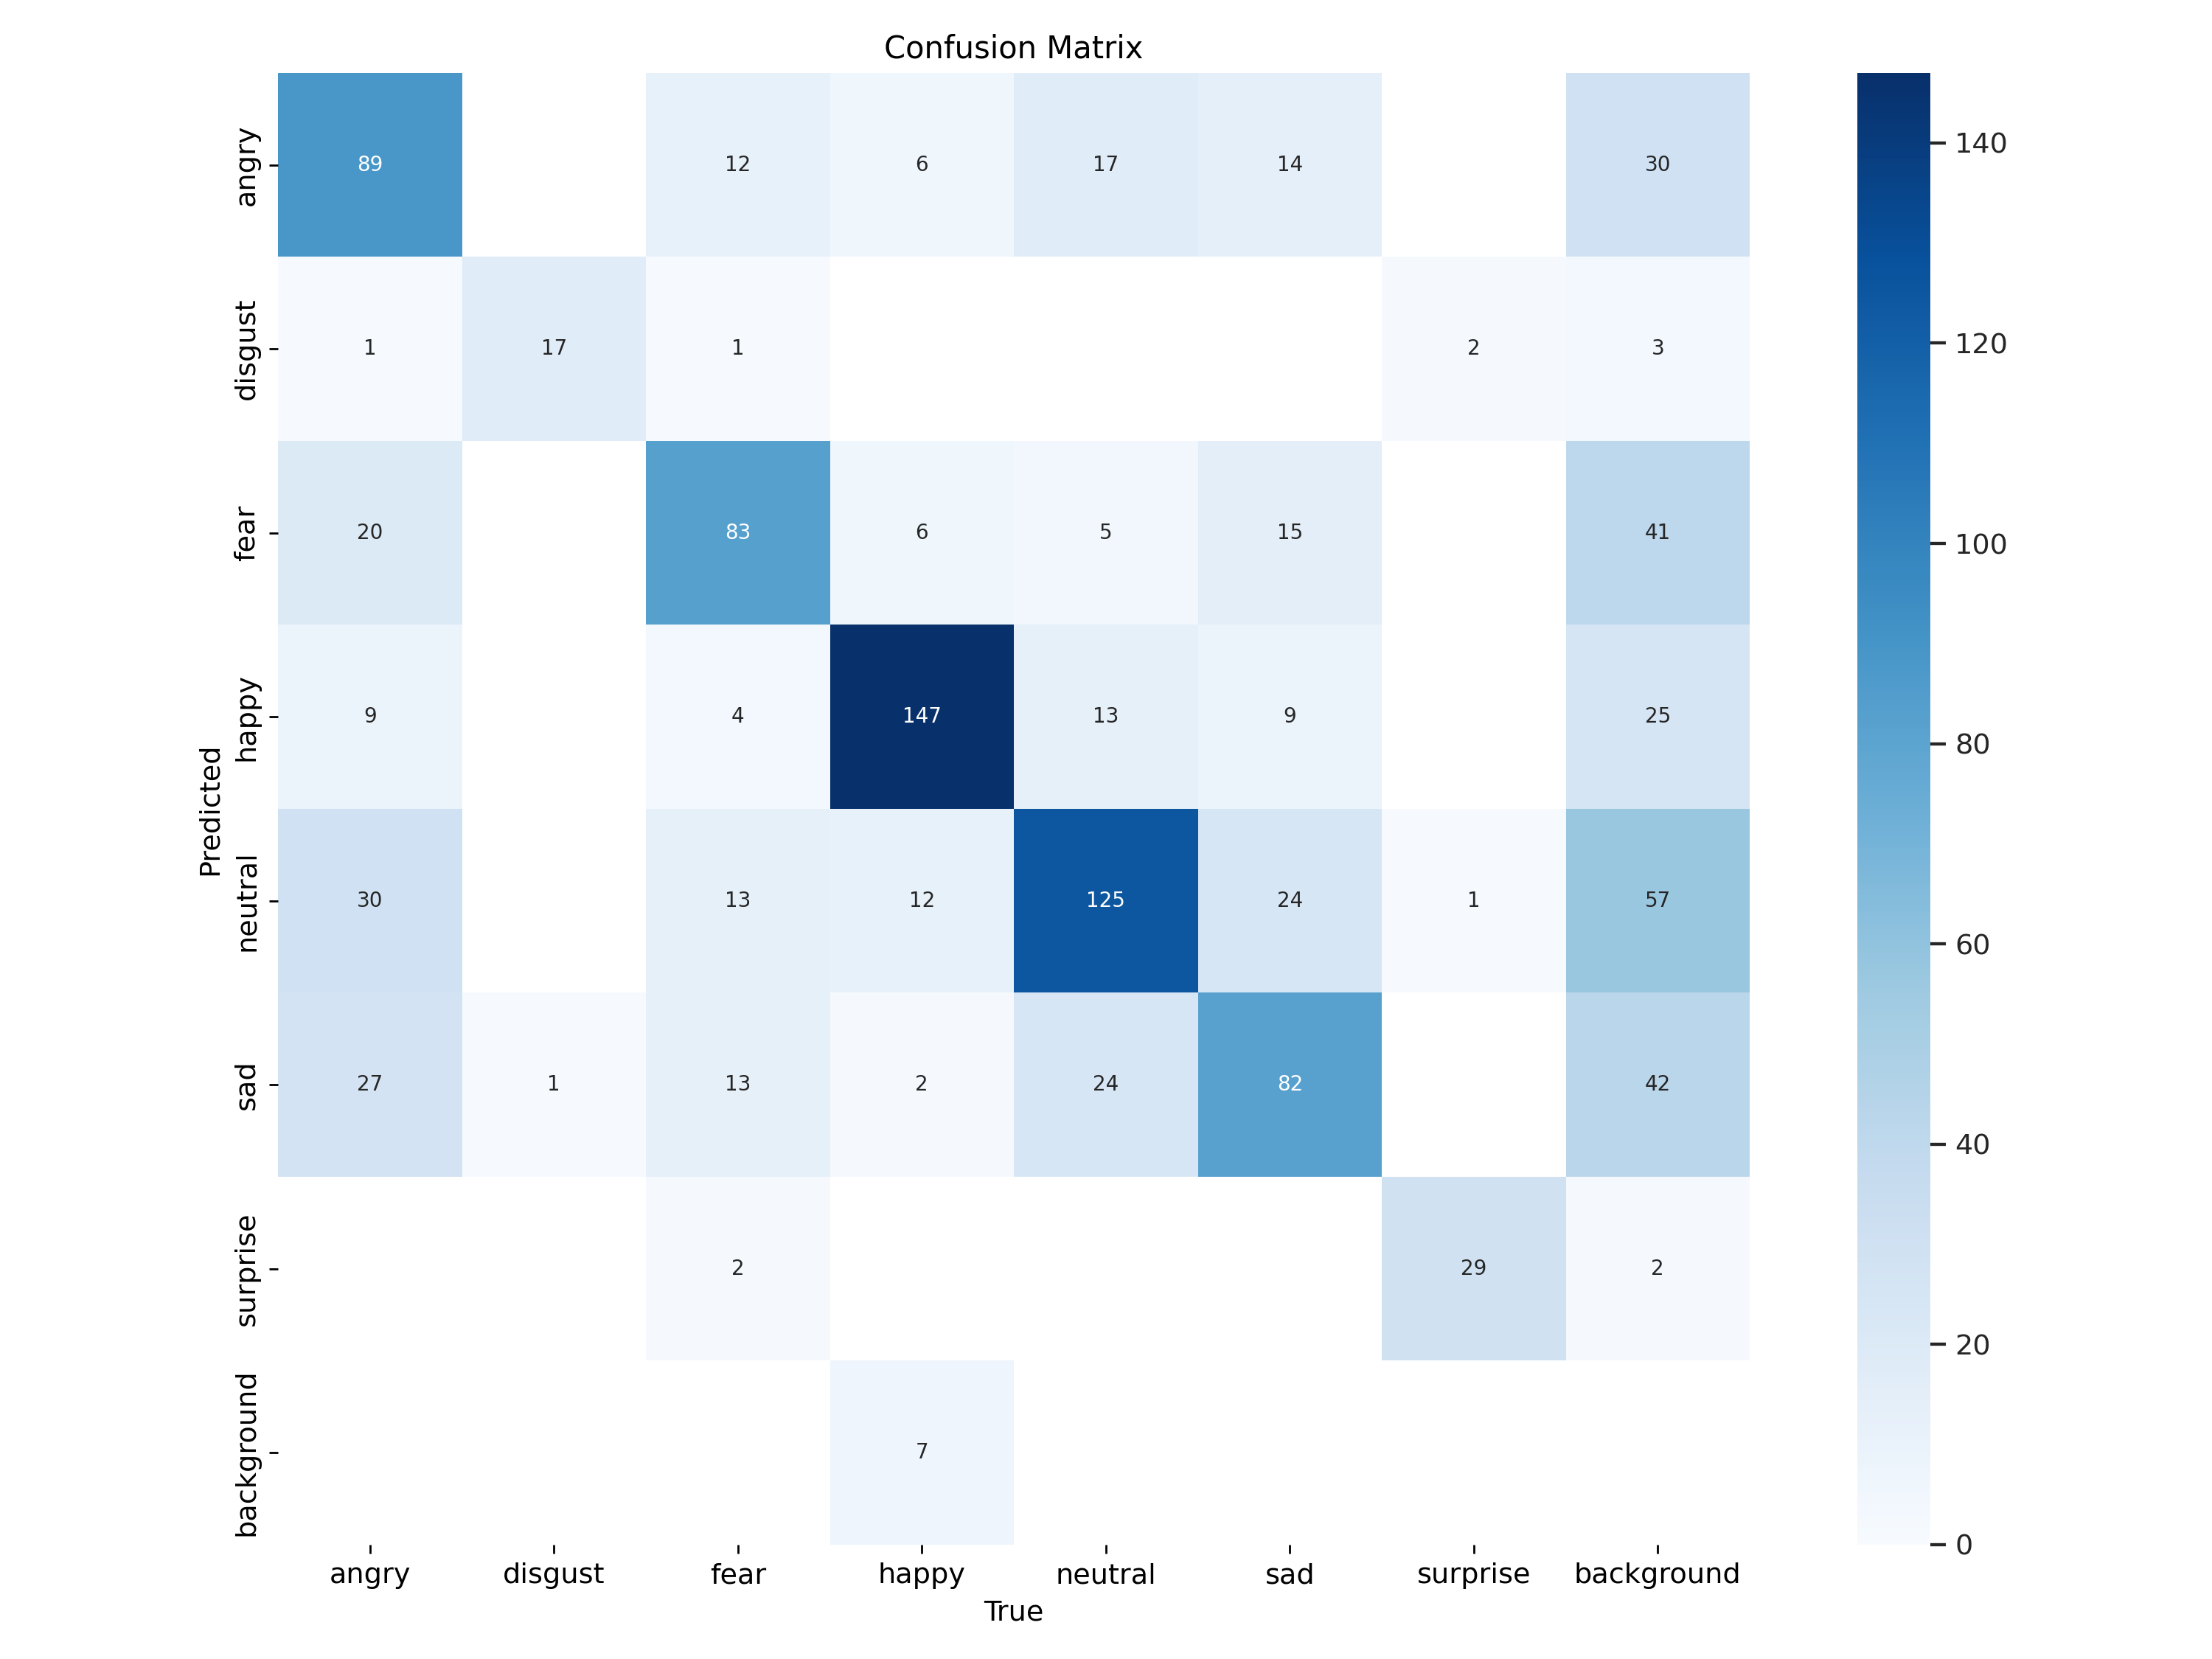

In [9]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

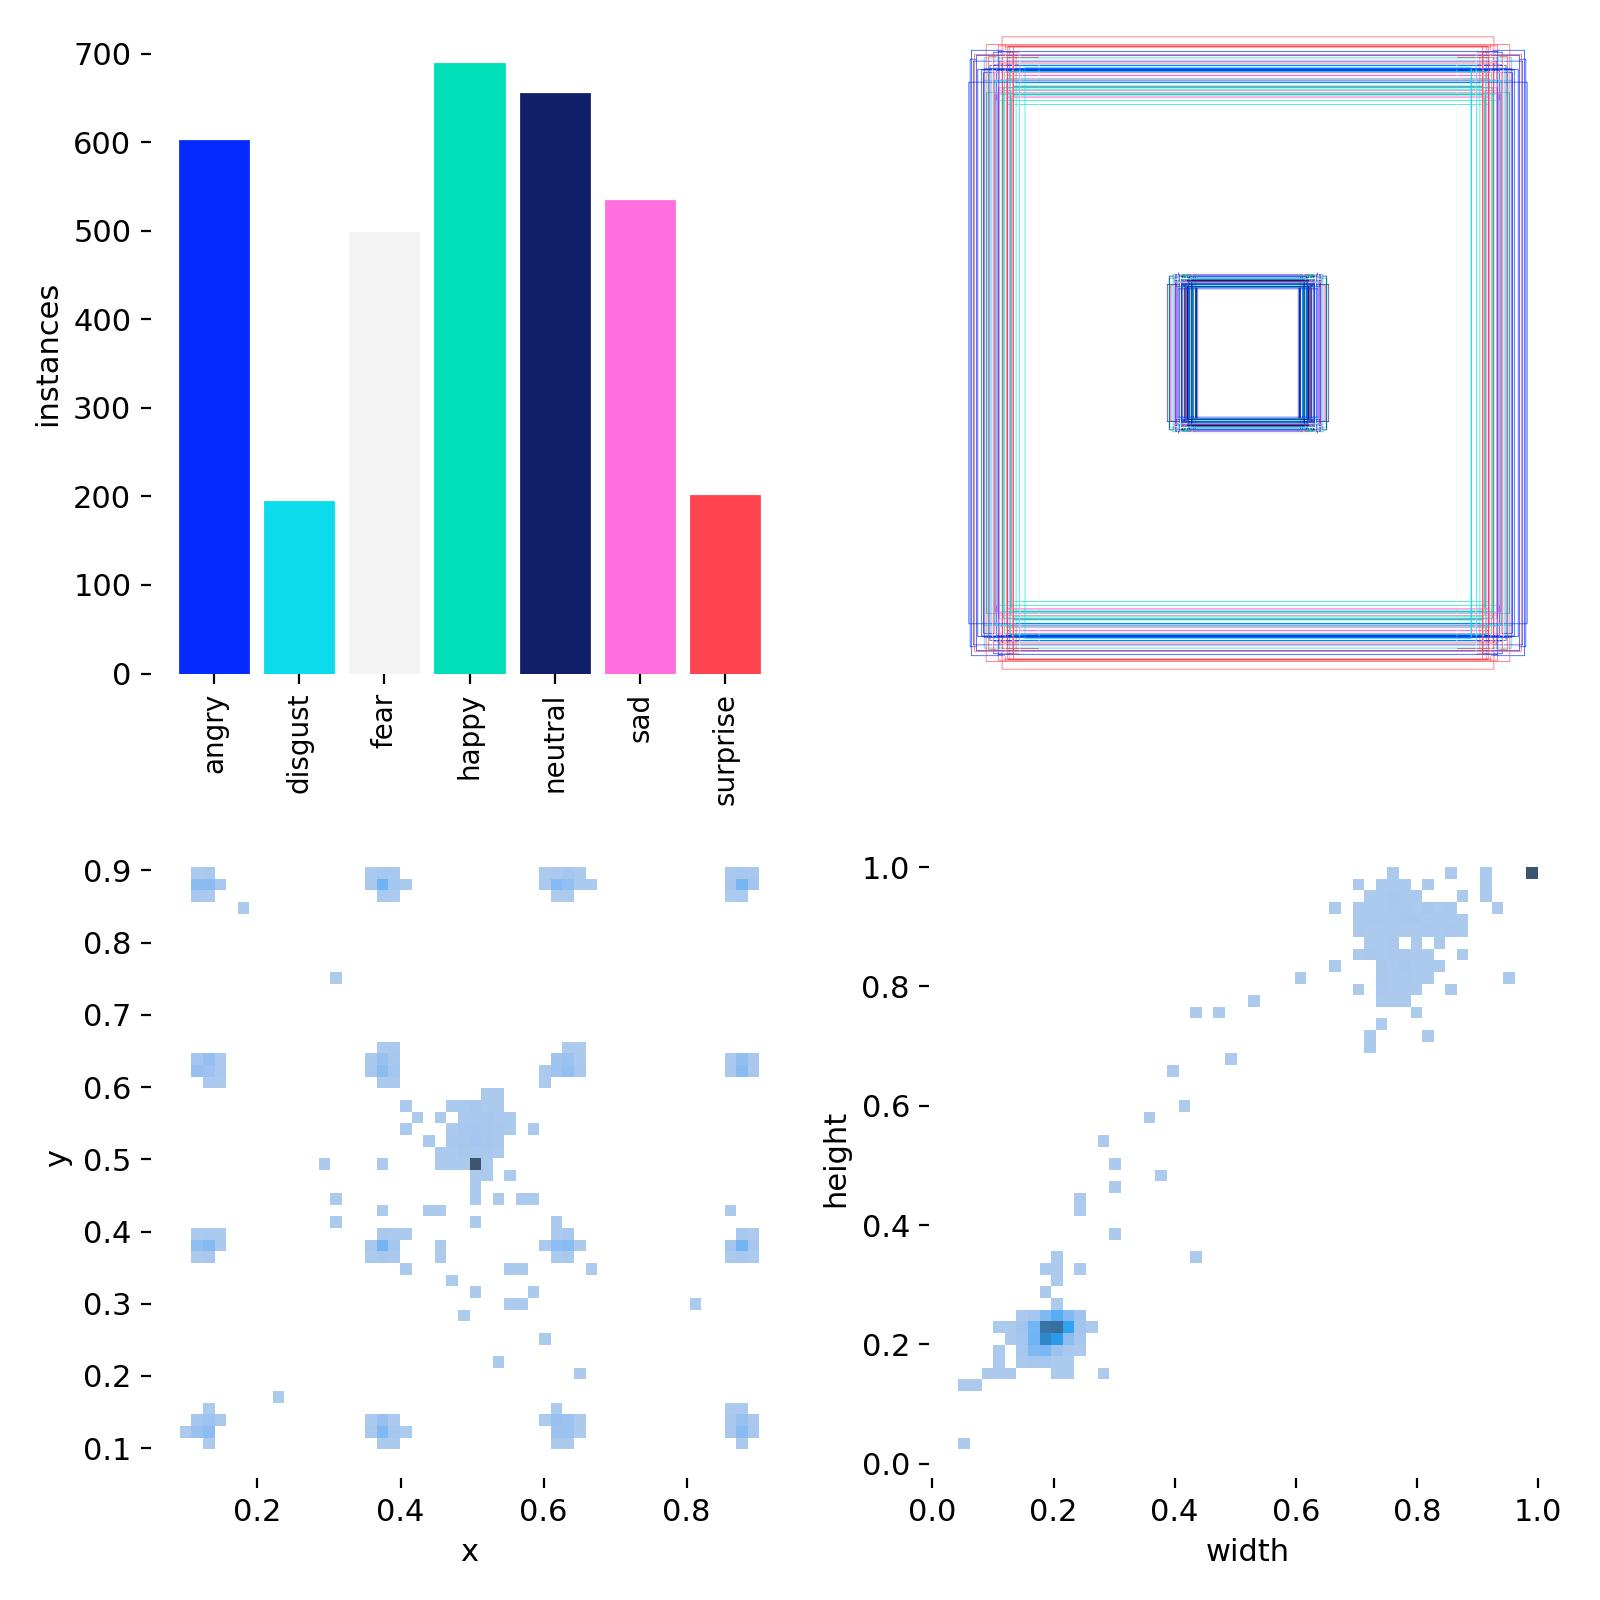

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

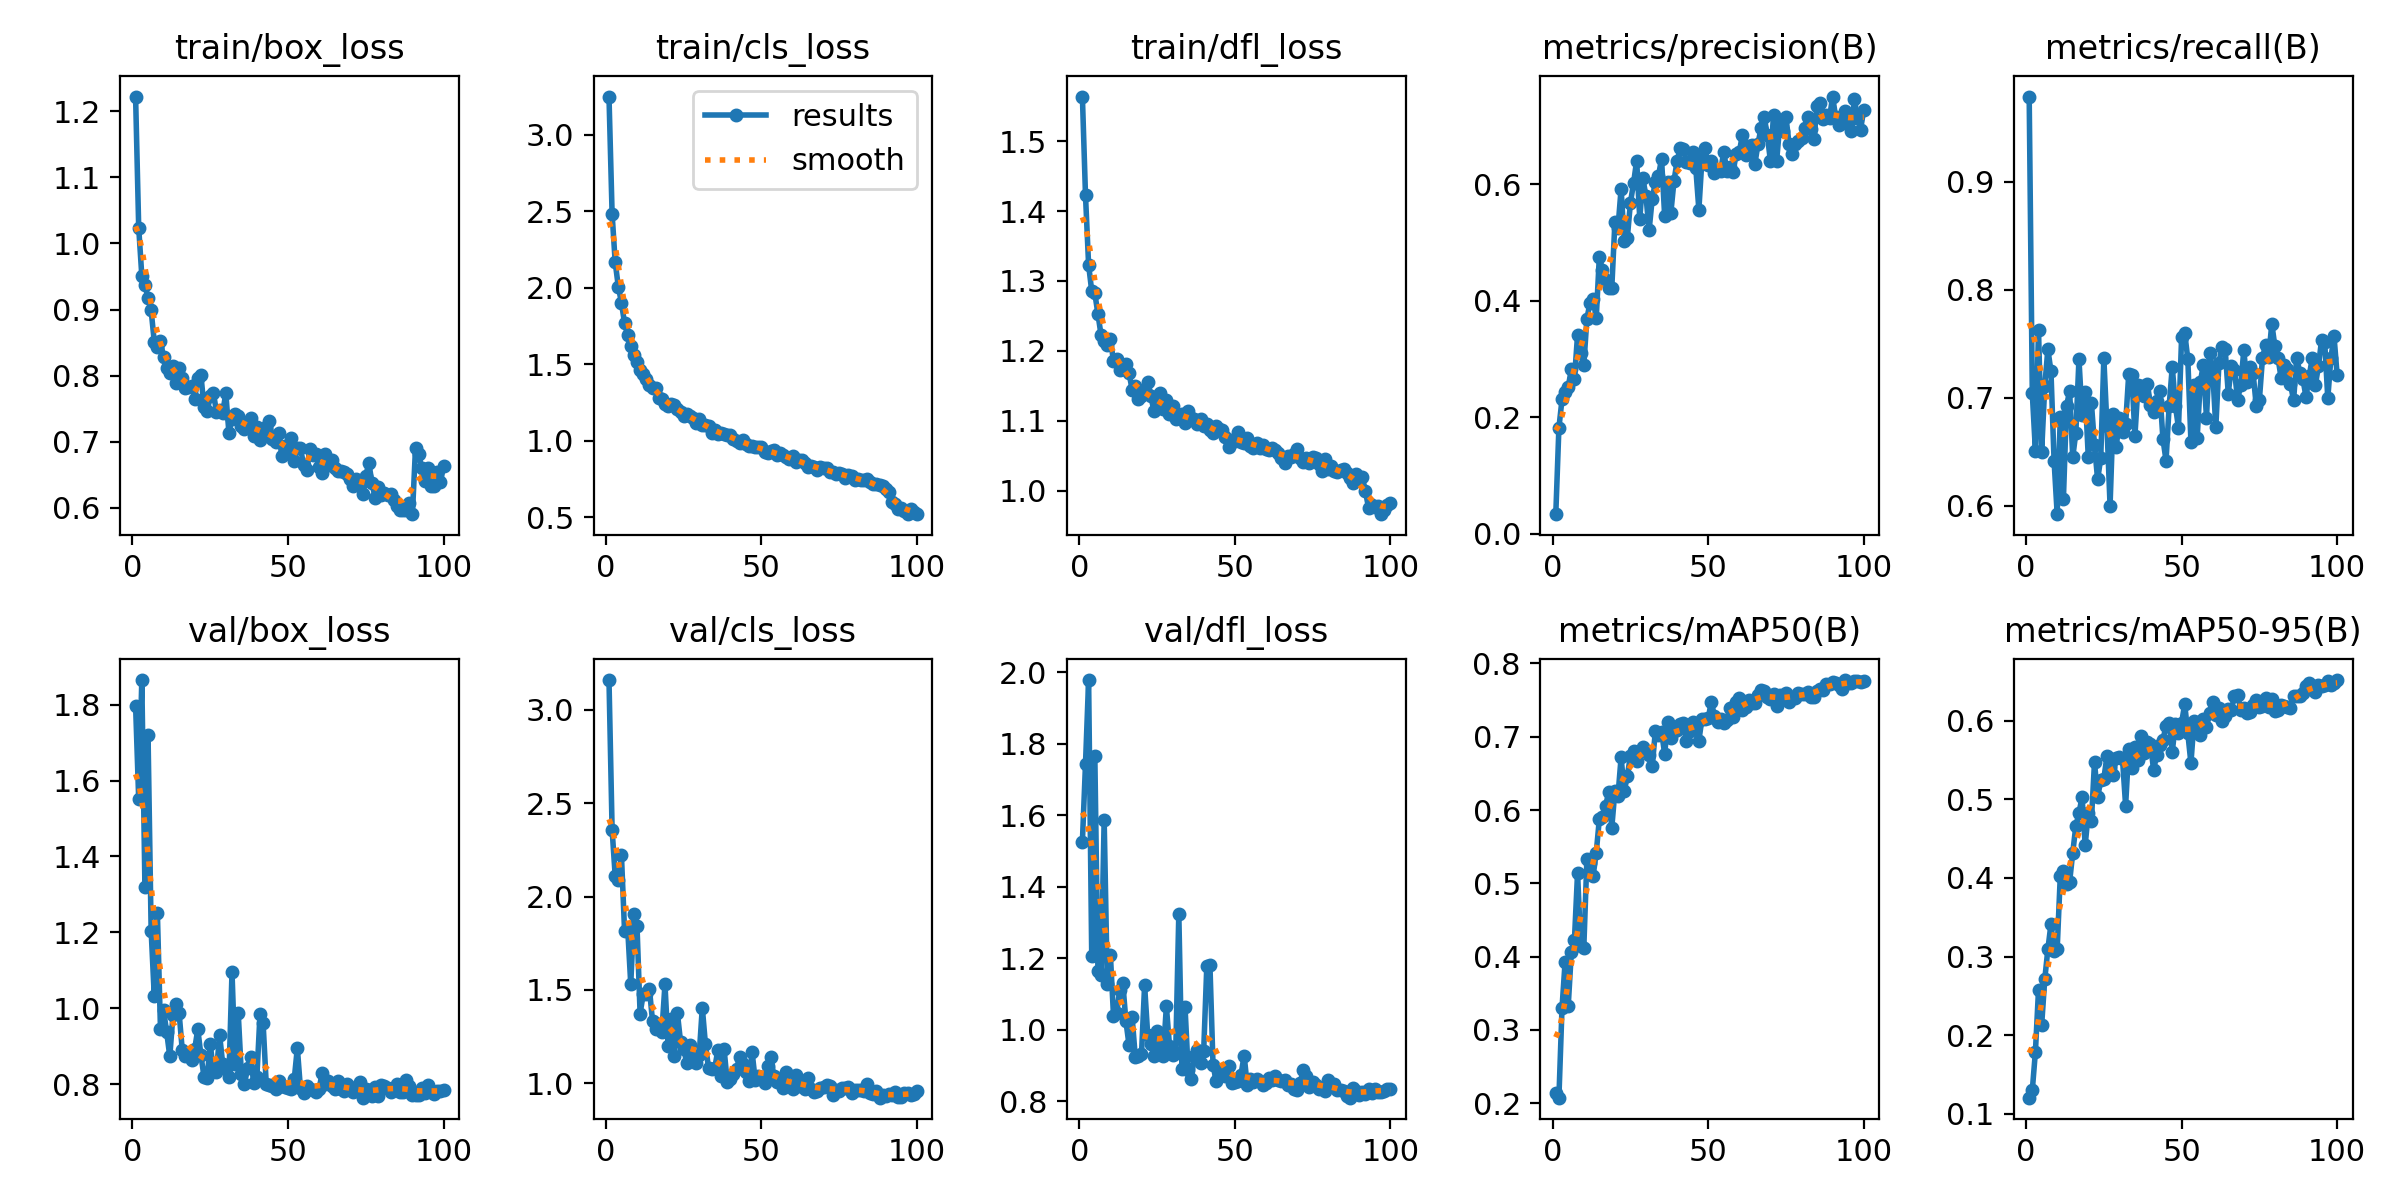

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

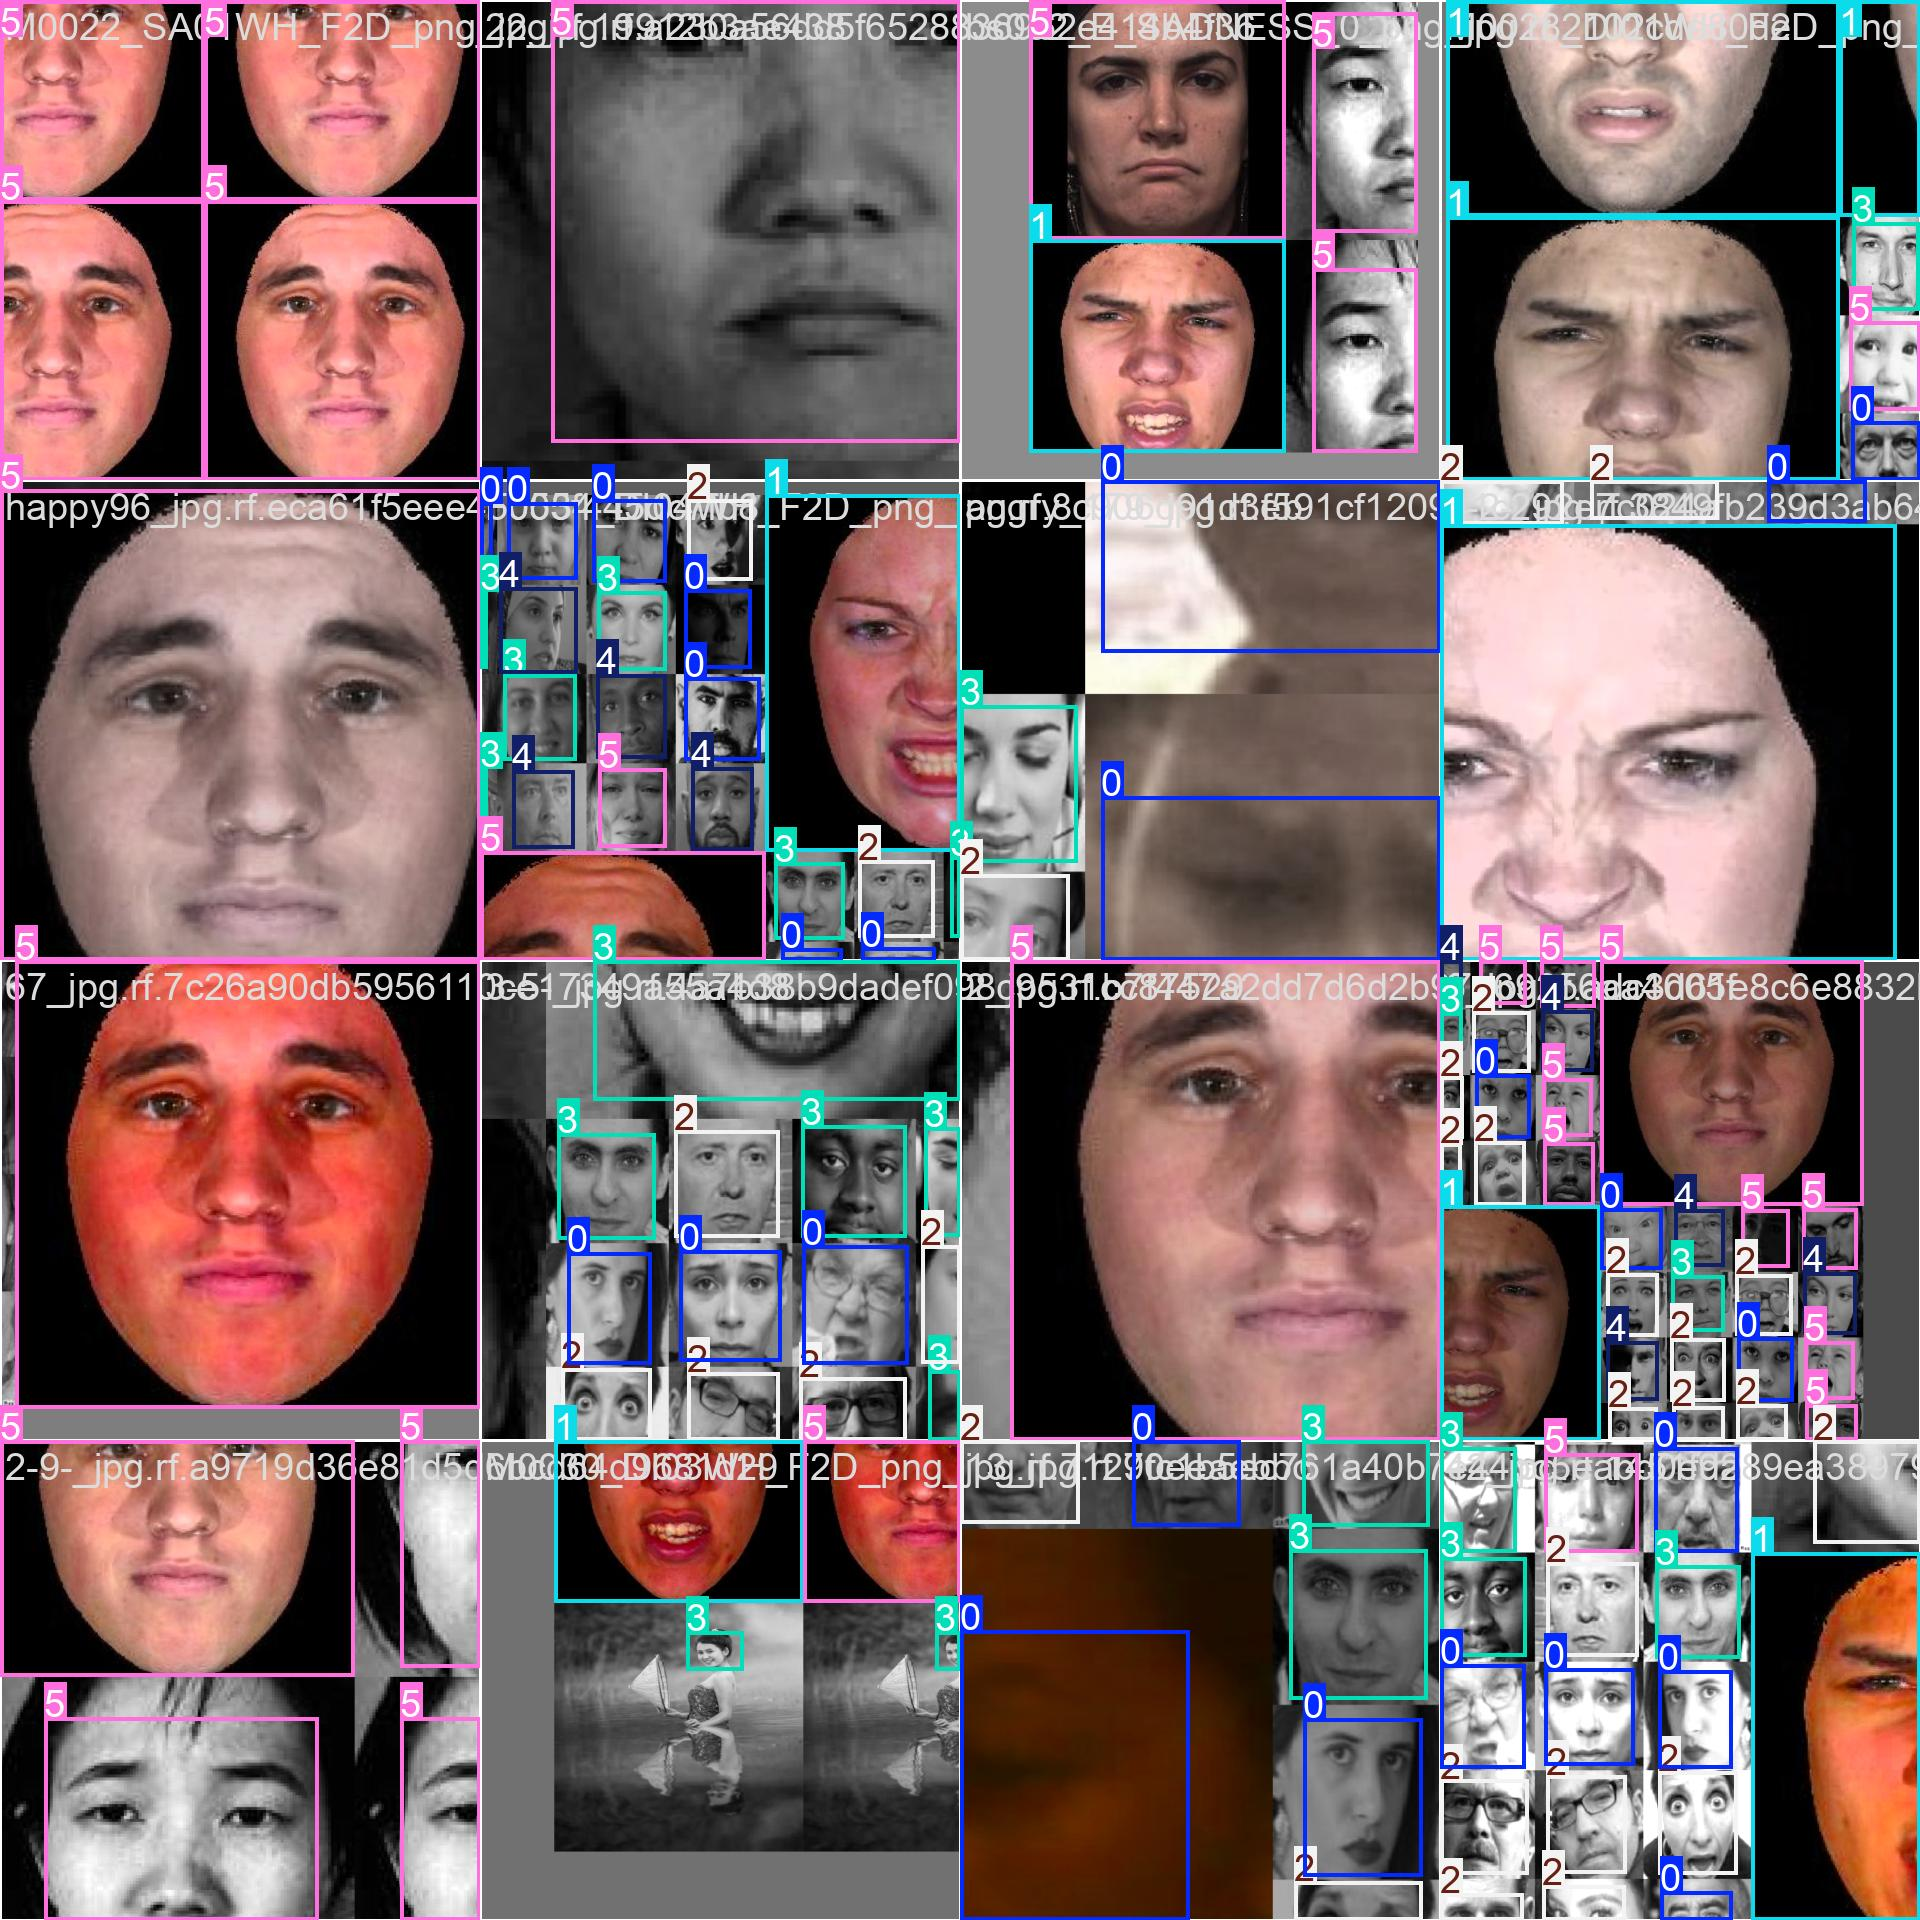

In [12]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

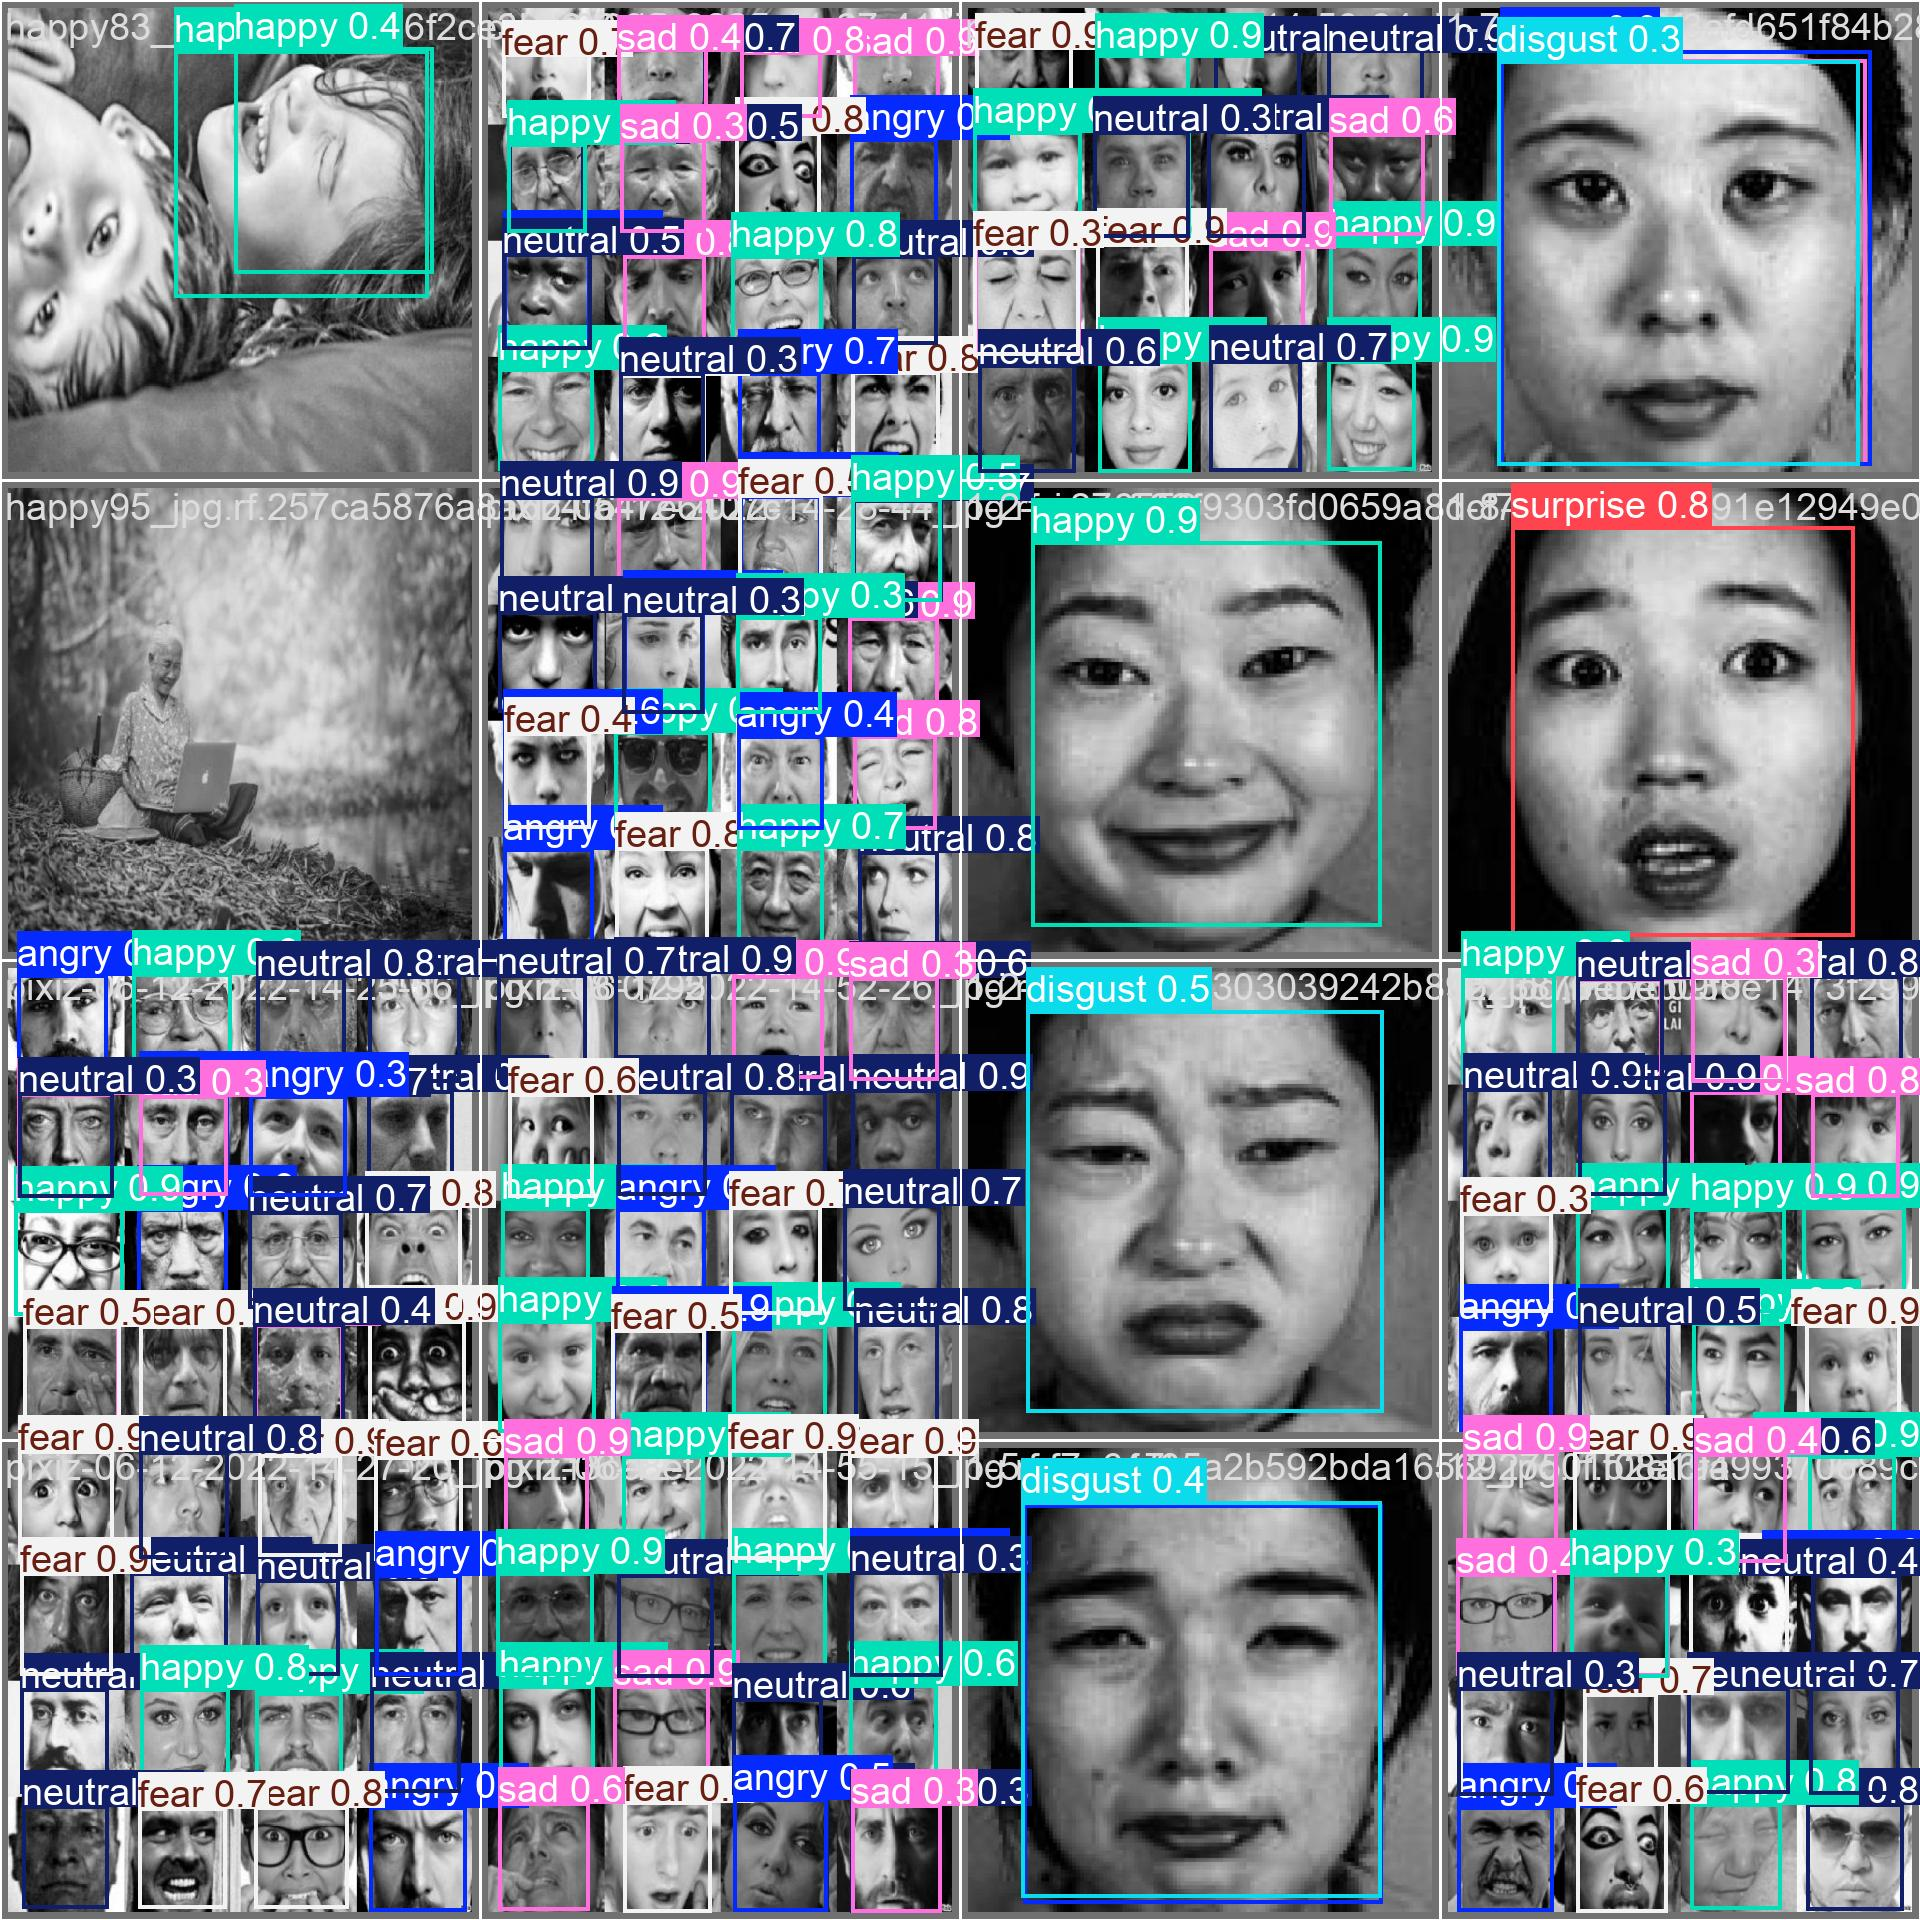

In [13]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [14]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:05<00:00,  2.03it/s]
                   all        185        862      0.726      0.723      0.776      0.652
                 angry         76        176      0.667      0.511      0.652      0.487
               disgust         18         18      0.848      0.933      0.927      0.916
                  fear         51        128      0.622      0.694      0.741      0.581
                 happy         64        180      0.802      0.806      0.873      0.652
               neutral         52        184      0.605       0.69      0.669      0.506
                   sad         64   

In [15]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 960x960 1 disgust, 12.9ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 960x960 1 angry, 1 sad, 13.0ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 960x960 1 happy, 12.9ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 960x960 3 angrys, 4 fears, 3 happys, 6 neutrals, 4 sads, 13.0ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 960x960 1 angry, 8 fears, 1 happy, 5 neutrals, 2 sads, 12.9ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb

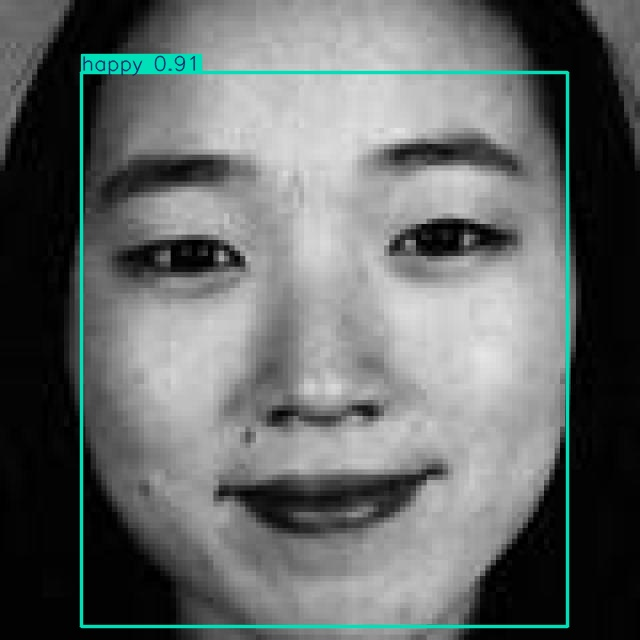

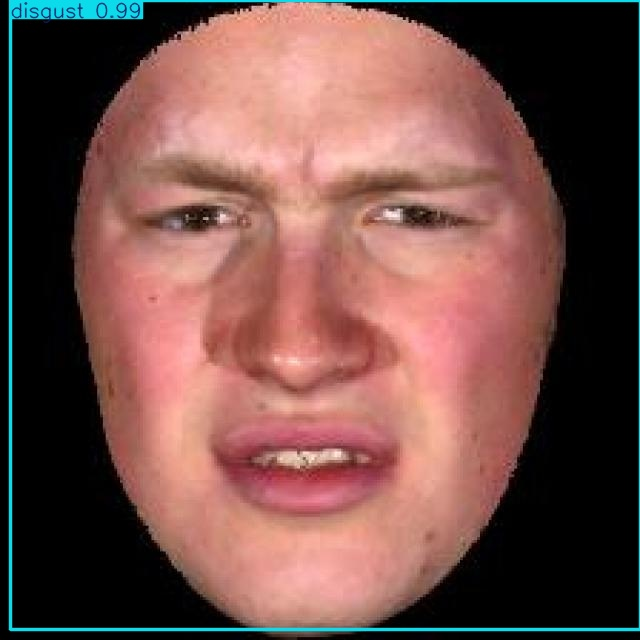

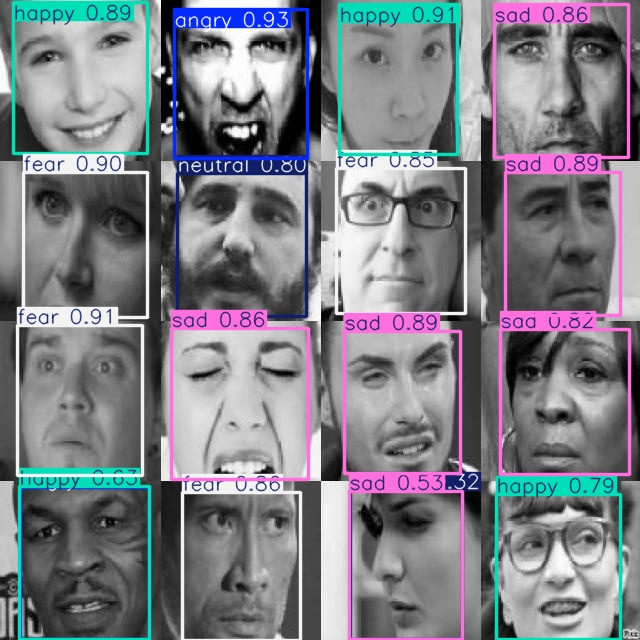

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")